# Regresja liniowa i wielomianowa

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

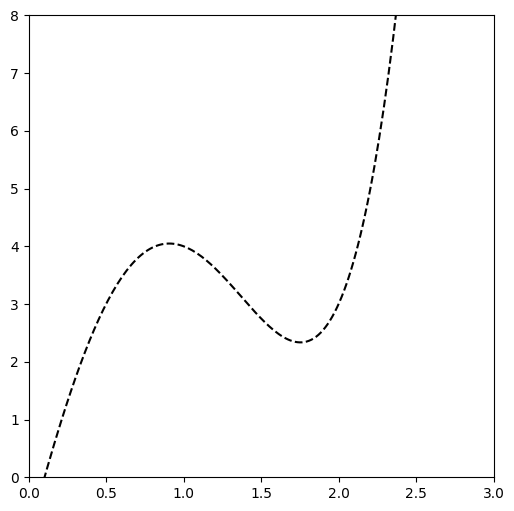

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

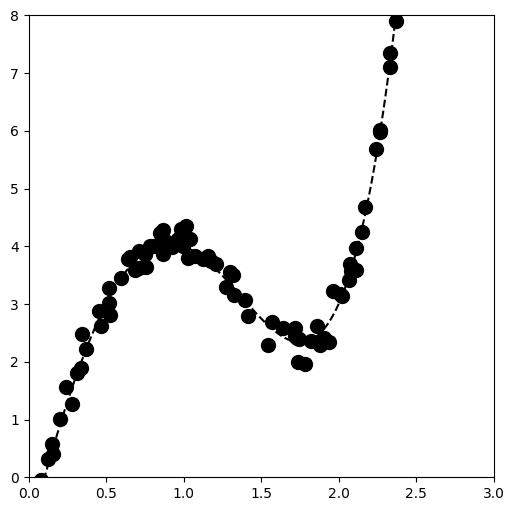

In [4]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [5]:
x=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x, y)

LinearRegression()

In [6]:
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x,y))

[5.55009552]
-2.02416904575127
0.46286150068658816


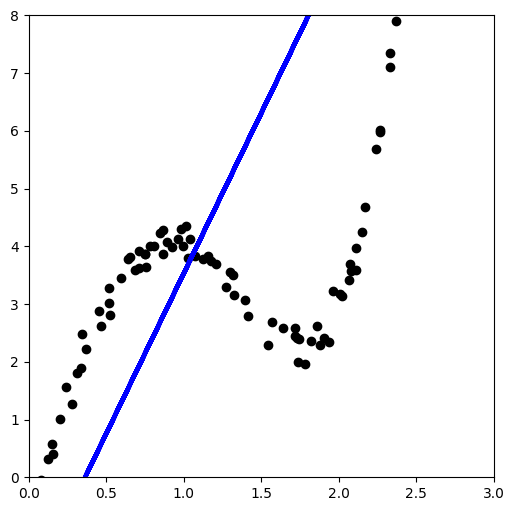

In [7]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x, model1.predict(x), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [9]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

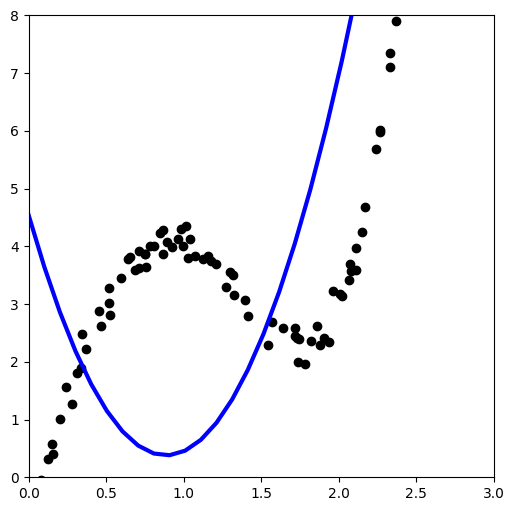

In [10]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [16]:
from sklearn.linear_model import LinearRegression


x_original = x
y_original = y

poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(x_original.reshape(-1, 1))
model_3 = LinearRegression().fit(X_poly_3, y_original)

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [13]:
poly_features_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_features_4.fit_transform(x_original.reshape(-1, 1))
model_4 = LinearRegression().fit(X_poly_4, y_original)

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [14]:
poly_features_5 = PolynomialFeatures(degree=5)
X_poly_5 = poly_features_5.fit_transform(x_original.reshape(-1, 1))
model_5 = LinearRegression().fit(X_poly_5, y_original)

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

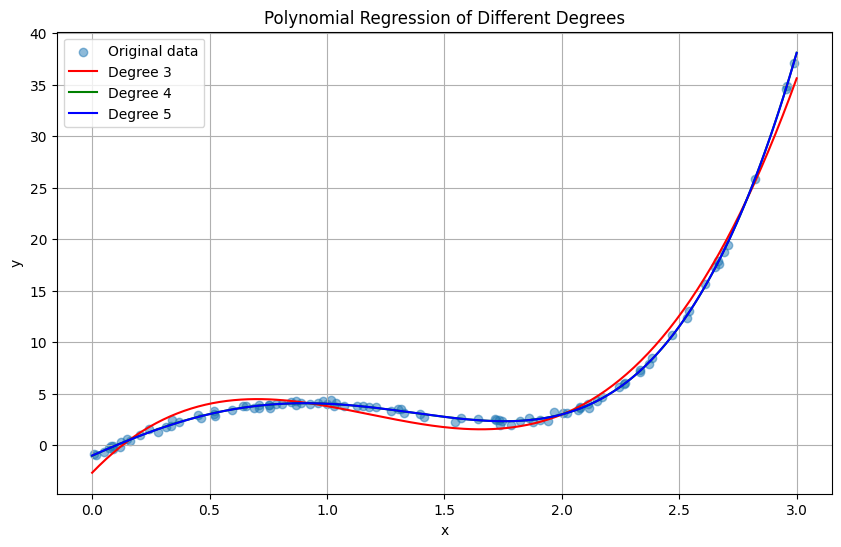

(0.6183204993059677, 0.030956716057413295, 0.03091910693177819)

In [17]:
x_range = np.linspace(0, 3, 200)


y_pred_3 = model_3.predict(poly_features_3.transform(x_range.reshape(-1, 1)))
y_pred_4 = model_4.predict(poly_features_4.transform(x_range.reshape(-1, 1)))
y_pred_5 = model_5.predict(poly_features_5.transform(x_range.reshape(-1, 1)))

plt.figure(figsize=(10, 6))
plt.scatter(x_original, y_original, label="Original data", alpha=0.5)
plt.plot(x_range, y_pred_3, label="Degree 3", color="red")
plt.plot(x_range, y_pred_4, label="Degree 4", color="green")
plt.plot(x_range, y_pred_5, label="Degree 5", color="blue")
plt.title("Polynomial Regression of Different Degrees")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error

mse_deg3 = mean_squared_error(y_original, model_3.predict(X_poly_3))
mse_deg4 = mean_squared_error(y_original, model_4.predict(X_poly_4))
mse_deg5 = mean_squared_error(y_original, model_5.predict(X_poly_5))

mse_deg3, mse_deg4, mse_deg5

# Zadanie
Musimy mieć jakąś miarę oceny.

In [ ]:
from sklearn import  metrics

error1 = np.average( np.abs(model1.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, model1.predict(x))))

error2 = np.average( (model1.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
print("Mean squared error: {}".format( metrics.mean_squared_error(y, model1.predict(x)) ))

error3 = np.median( np.abs(model1.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y, model1.predict(x)) ))

print("R^2: {}".format(metrics.r2_score(y, model1.predict(x))))
ss_res=np.sum( (y-model1.predict(x))**2 )
ss_tot=np.sum( (y-np.mean(y))**2 )
R=1-ss_res/ss_tot
print("R^2: {}".format(R))

error4 = 1-np.var(y - model1.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y, model1.predict(x)) ))


Mean absolute errors: 4.456948109978724
Mean absolute errors: 4.456948109978724
Mean squared error: 32.06603288914619
Mean squared error: 32.06603288914619
Median absolute error: 3.429749408028912
Median absolute error: 3.429749408028912
R^2: 0.567102498146086
R^2: 0.567102498146086
Explained variance score: 0.5671024981460862
Explained variance score: 0.5671024981460862


# Zadanie

Wylicz powyższe miary dla wszytkich modeli.

model1
Explained variance score: 0.5671024981460862
Median absolute error: 3.429749408028912
Mean squared error: 32.06603288914619
Mean absolute errors: 4.456948109978724
model2
Explained variance score: 0.8262963979794931
Median absolute error: 3.200497059547173
Mean squared error: 12.866753426616883
Mean absolute errors: 3.1072822476947497
model3
Explained variance score: 0.9917724400944231
Median absolute error: 0.5711004153125712
Mean squared error: 0.60944035343193
Mean absolute errors: 0.6369304345515707
model4
Explained variance score: 0.9993738397323646
Median absolute error: 0.1515290267694553
Mean squared error: 0.0463815929865281
Mean absolute errors: 0.17438028476640557
model5
Explained variance score: 0.999373862023442
Median absolute error: 0.15313137820101091
Mean squared error: 0.046379941818716214
Mean absolute errors: 0.17432842197705434
